## Project -> Student Performance Indicator

### Life Cycle of ML Project:
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- EDA
- Data Preprocessing
- Model Training
- Choosing the best model

## 1. Problem Statement:
- This projects understands how the student's performance (test scores) is affected by other features such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course. 

## 2. Data Collection:
- Dataset  consists of 1000 rows and 8 columns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
## Describe the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3. Data Checks to perform:
- Check for missing values
- Check for duplicate rows
- Check Data type
- Check number of uniques values of each column
- Check stats of dataset
- Check varoius categories in different categorical columnn


In [4]:
## Check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
## Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [6]:
## Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
## Check number of uniques values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
## Check stats of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
## Exploring dataset
print('Categories in gender feature: ',end=' ')
print(df['gender'].unique())

print('Categories in race/ethnicity feature: ',end=' ')
print(df['race_ethnicity'].unique())

print('Categories in parental level of education feature: ',end=' ')
print(df['parental_level_of_education'].unique())

print('Categories in lunch feature: ',end=' ')
print(df['lunch'].unique())

print('Categories in test preparation course feature: ',end=' ')
print(df['test_preparation_course'].unique())

Categories in gender feature:  ['female' 'male']
Categories in race/ethnicity feature:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch feature:  ['standard' 'free/reduced']
Categories in test preparation course feature:  ['none' 'completed']


In [10]:
## Numerical and categorical features
num_features = [feature for feature in df.columns if df.dtypes[feature] != 'O']
cat_features = [feature for feature in df.columns if df.dtypes[feature] == 'O']

print('Numerical features: ', num_features)
print('Categorical features: ', cat_features)

Numerical features:  ['math_score', 'reading_score', 'writing_score']
Categorical features:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
## Adding columns for 'Total Score' and 'Average Score'
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
## Getting number of students with full score in each subject
math_full_score = df[df['math_score'] == 100]['average_score'].count()
reading_full_score = df[df['reading_score'] == 100]['average_score'].count()
writing_full_score = df[df['writing_score'] == 100]['average_score'].count()

print(f"Number of students with full score in Math: {math_full_score}")
print(f"Number of students with full score in Reading: {reading_full_score}")
print(f"Number of students with full score in Writing: {writing_full_score}")

Number of students with full score in Math: 7
Number of students with full score in Reading: 17
Number of students with full score in Writing: 14


In [13]:
## Getting number of students with min score in each subject
math_min_score = df[df['math_score'] <=33]['average_score'].count()
reading_min_score = df[df['reading_score'] <=33]['average_score'].count()
writing_min_score = df[df['writing_score'] <=33]['average_score'].count()

print(f"Number of students with min score in Math: {math_min_score}")
print(f"Number of students with min score in Reading: {reading_min_score}")
print(f"Number of students with min score in Writing: {writing_min_score}")

Number of students with min score in Math: 20
Number of students with min score in Reading: 11
Number of students with min score in Writing: 14


### Insights from the dataset:
1. from the dataset it can be observed that students have performed worst in maths.
2. Best perforamnce is in Reading

## 4. Explore Dataset ( Visualization )
- Histogram
- Kernel Distribution function ( KDE)

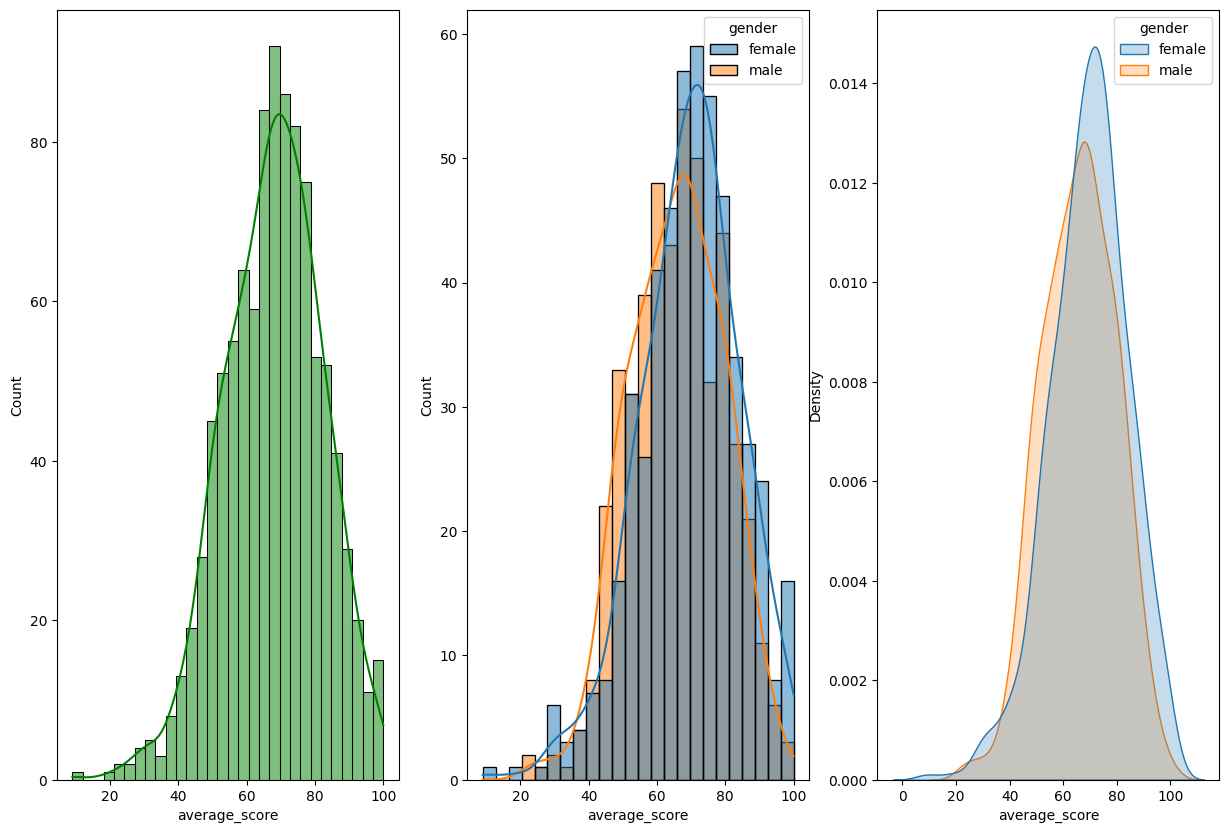

In [21]:
## Histogram and KDE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(1,3,2)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.subplot(1,3,3)
sns.kdeplot(data=df,x='average_score',shade=True,hue='gender') 
plt.show()           

In [22]:
## Insight: Female students have a higher average score

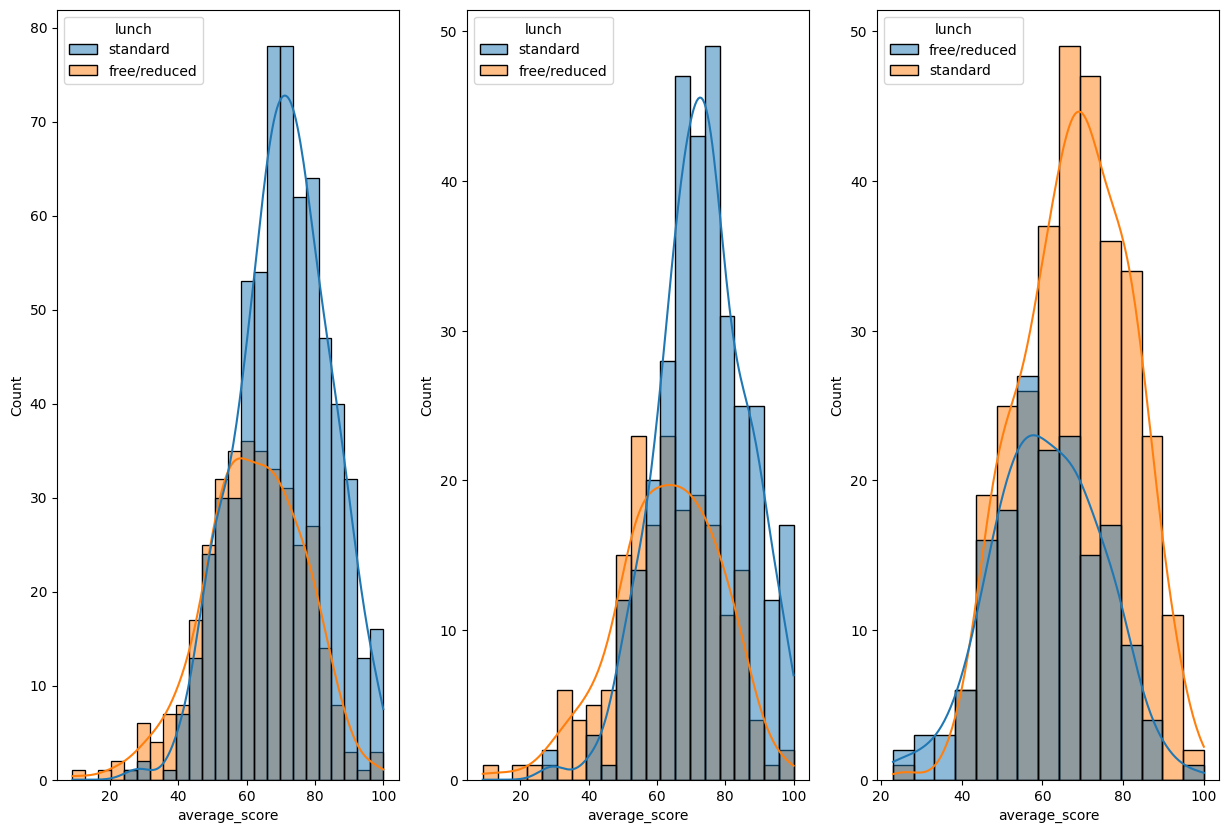

In [26]:
plt.subplots(1,3,figsize=(15, 10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender == 'male'],x='average_score',kde=True,hue='lunch')
plt.show()

## Insights:
- Standard lunch helps perform well in exams being it male or female.

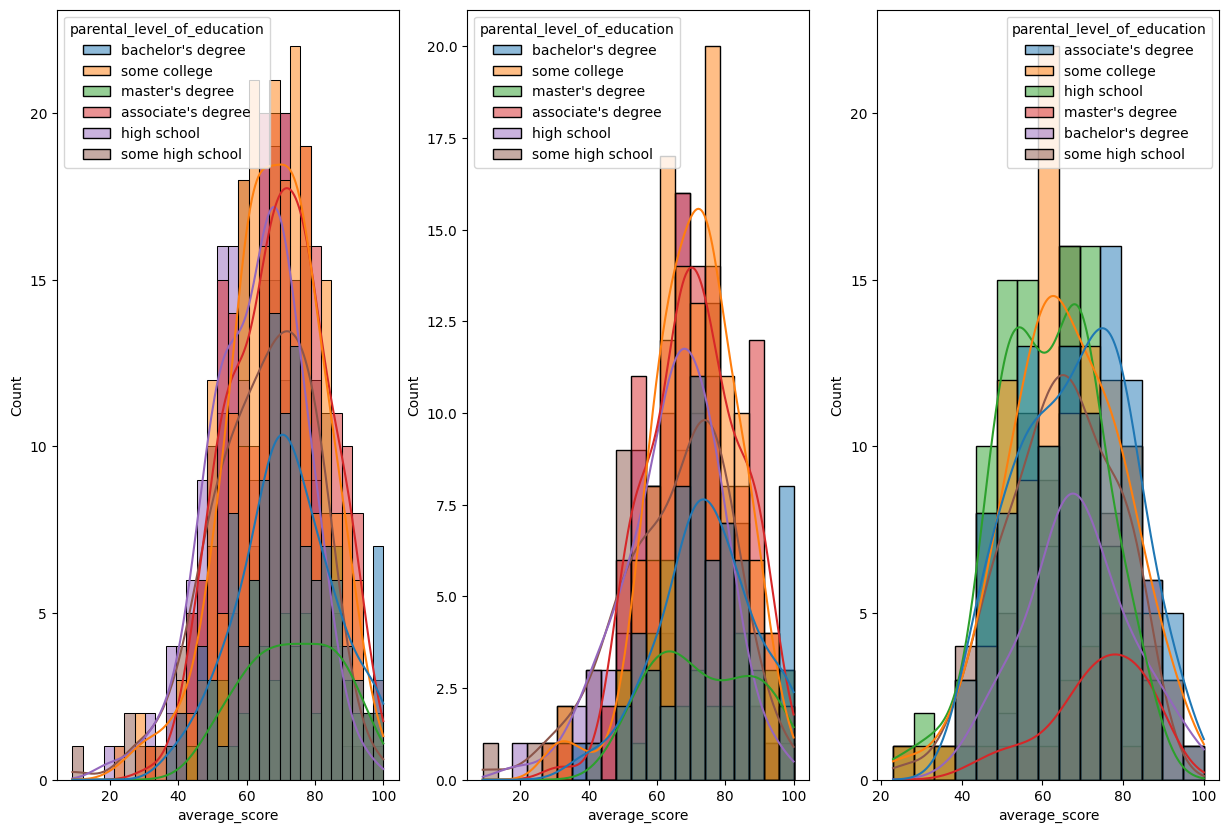

In [28]:
plt.subplots(1,3,figsize=(15, 10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

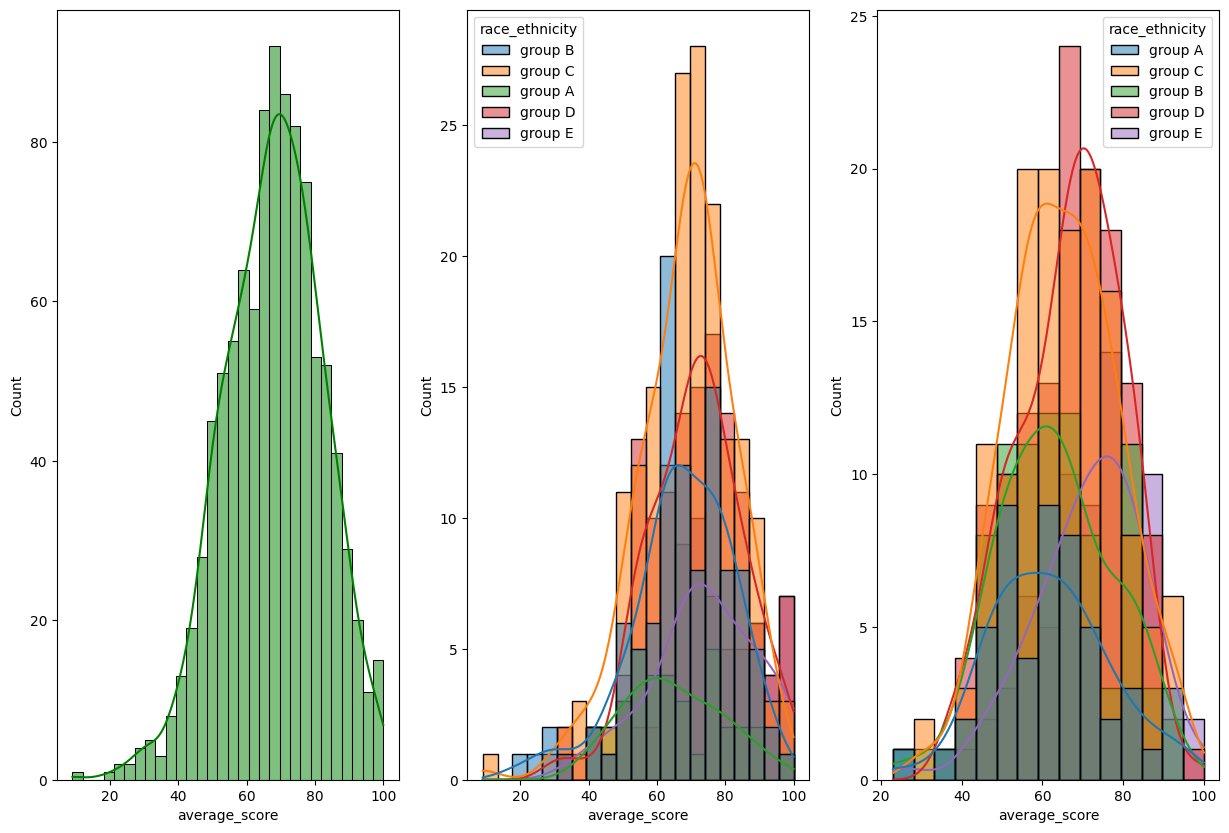

In [29]:
plt.subplots(1,3,figsize=(15, 10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender == 'female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender == 'male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

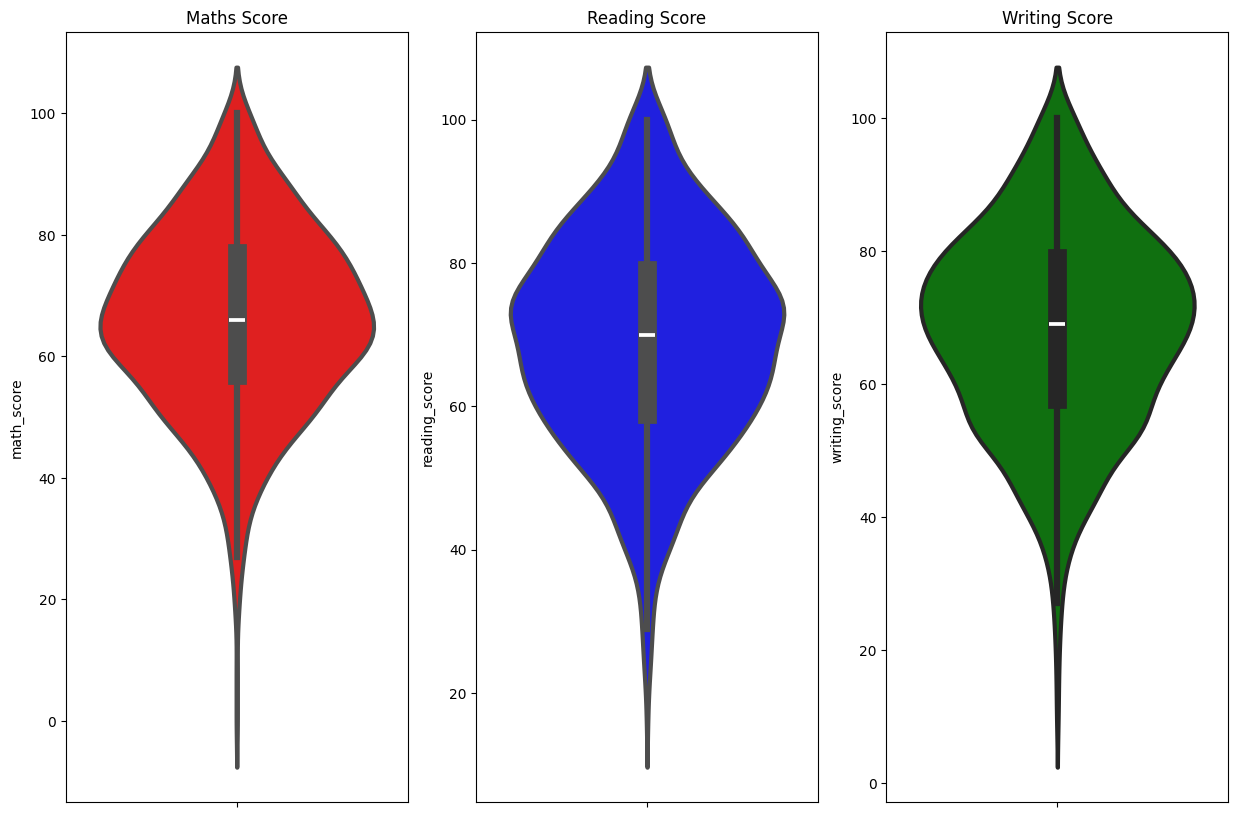

In [31]:
plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.title('Maths Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('Reading Score')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(1,3,3)
plt.title('Writing Score')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()

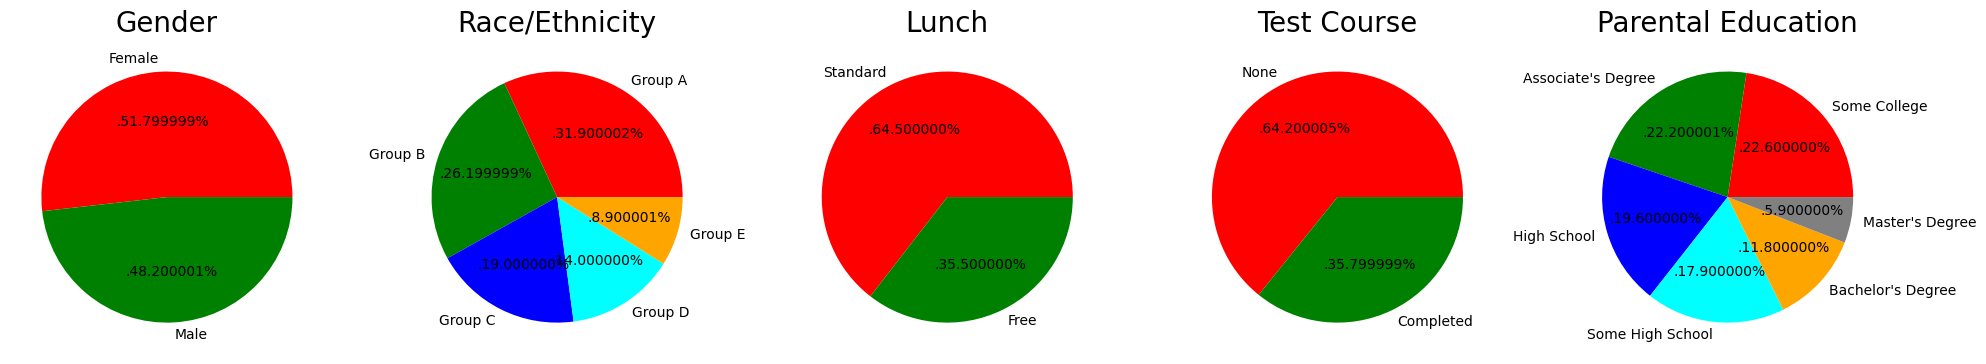

In [36]:
plt.rcParams['figure.figsize'] = (20, 5)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', 'Group B','Group C','Group D','Group E'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

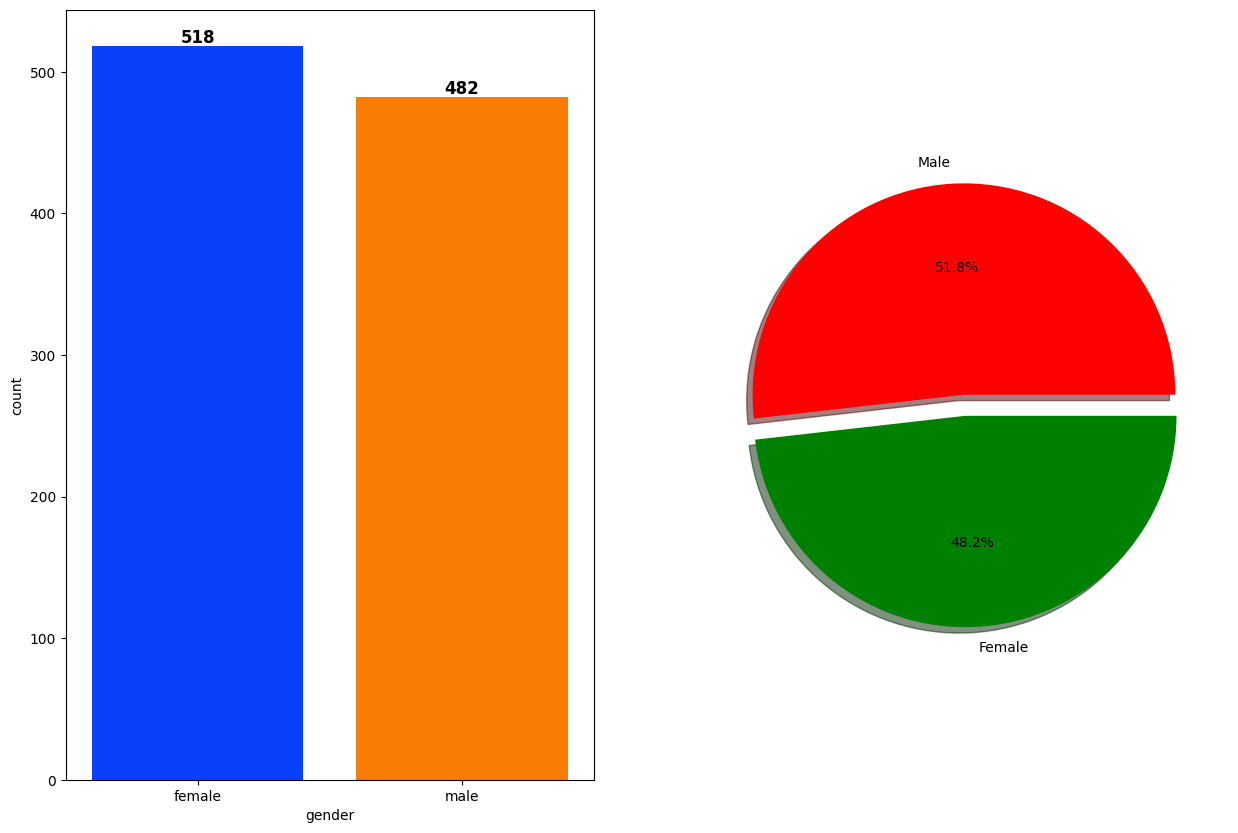

In [40]:
f,ax = plt.subplots(1,2,figsize=(15, 10))
sns.countplot(x=df['gender'],data=df,ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', weight='bold',size=12)

plt.pie(x=df.gender.value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['red','green'])
plt.show()

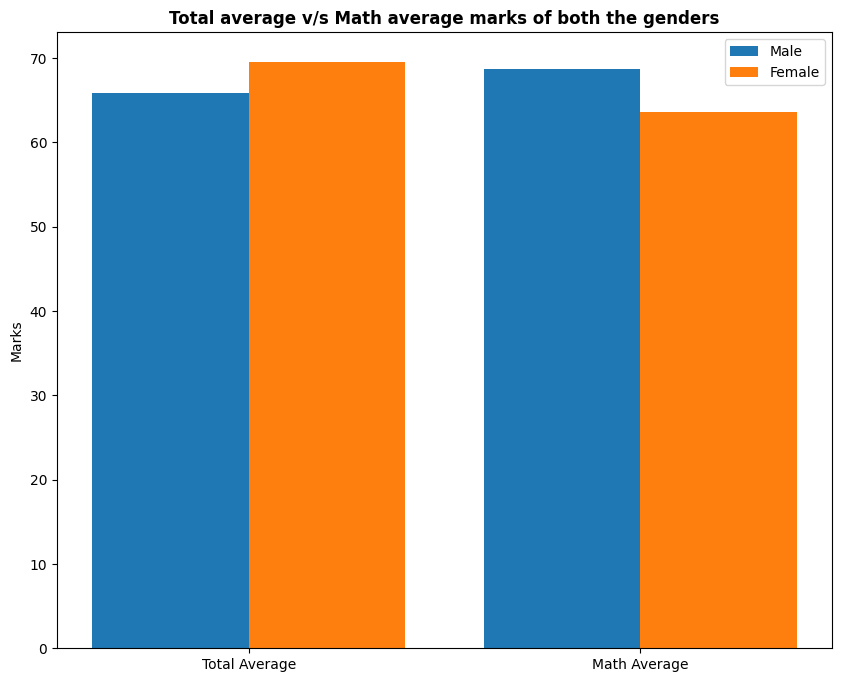

In [50]:
gender_group = df.groupby('gender').mean(numeric_only=True)

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

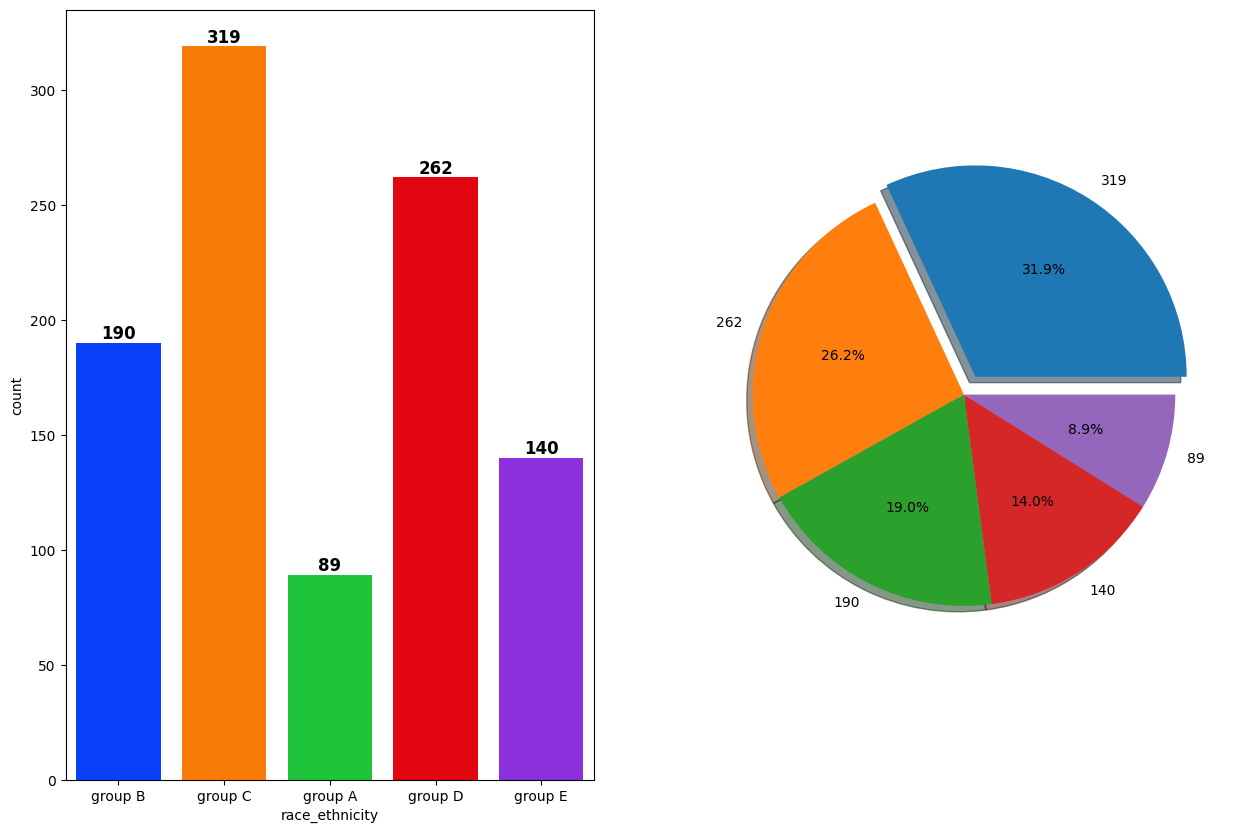

In [54]:
f,ax = plt.subplots(1,2,figsize=(15, 10))
sns.countplot(x=df['race_ethnicity'],data=df,ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', weight='bold',size=12)

plt.pie(x=df.race_ethnicity.value_counts(),labels=df['race_ethnicity'].value_counts(),explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

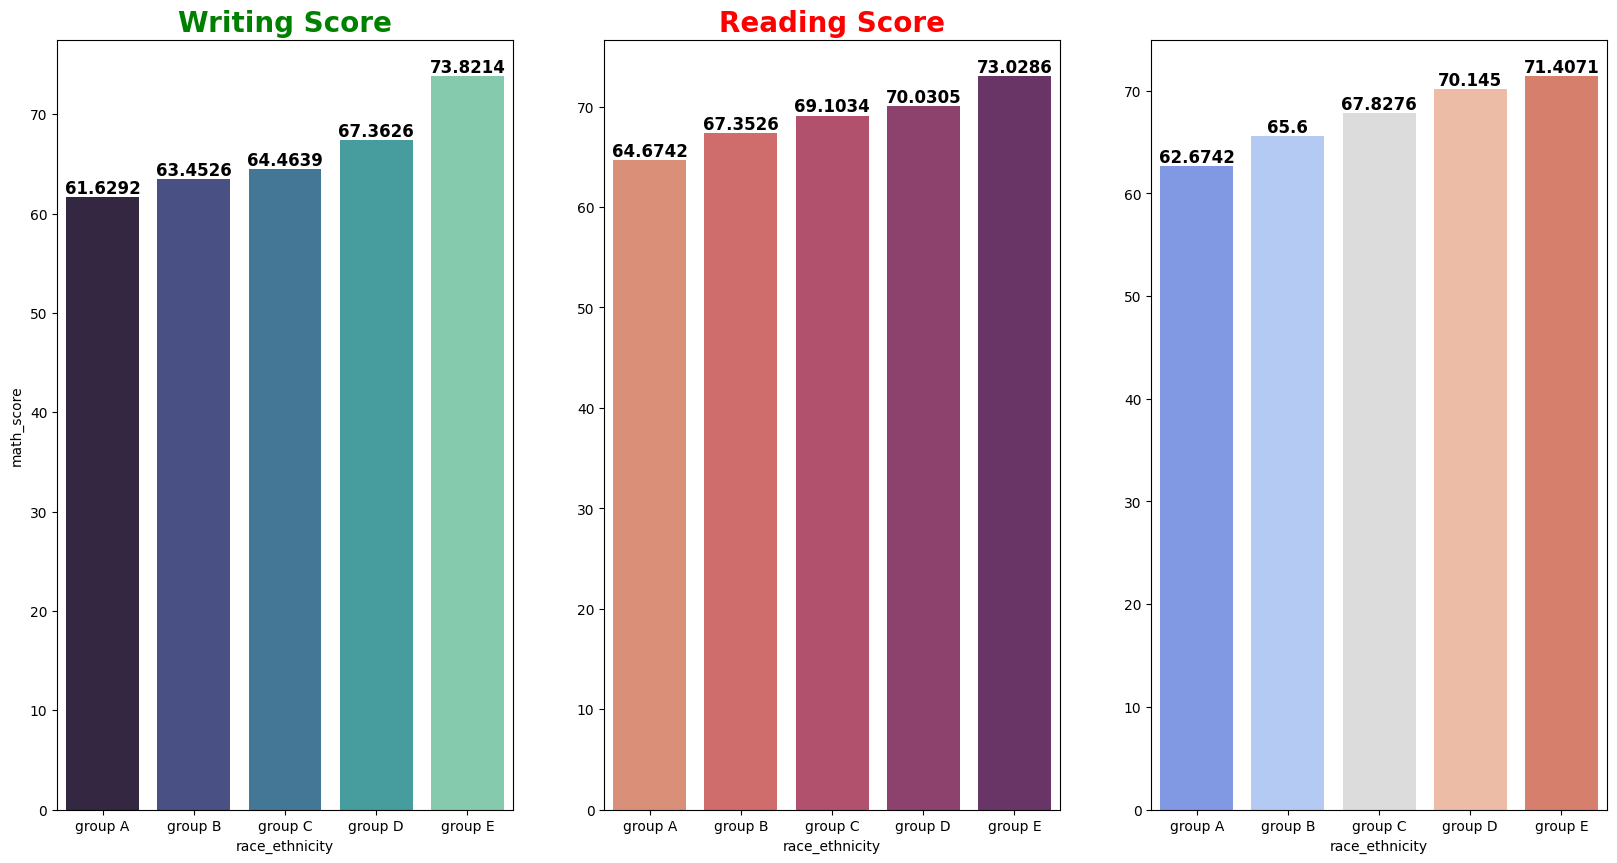

In [65]:
race_ethnicity_group = df.groupby('race_ethnicity').mean(numeric_only=True)

f,ax = plt.subplots(1,3,figsize=(20, 10))
sns.barplot(x=race_ethnicity_group.index,y=race_ethnicity_group['math_score'],palette='mako',ax=ax[0])
ax[0].set_title('Math Score',size=20,fontweight='bold',color='blue')

for container in ax[0].containers:
    ax[0].bar_label(container, label_type='edge', color='black', weight='bold',size=12)

sns.barplot(x=race_ethnicity_group['reading_score'].index,y=race_ethnicity_group['reading_score'].values,palette='flare',ax=ax[1])
ax[1].set_title('Reading Score',size=20,fontweight='bold',color='red')

for container in ax[1].containers:
    ax[1].bar_label(container, label_type='edge', color='black', weight='bold',size=12)

sns.barplot(x=race_ethnicity_group['writing_score'].index,y=race_ethnicity_group['writing_score'].values,palette='coolwarm',ax=ax[2])
ax[0].set_title('Writing Score',size=20,fontweight='bold',color='green')

for container in ax[2].containers:
    ax[2].bar_label(container, label_type='edge', color='black', weight='bold',size=12)

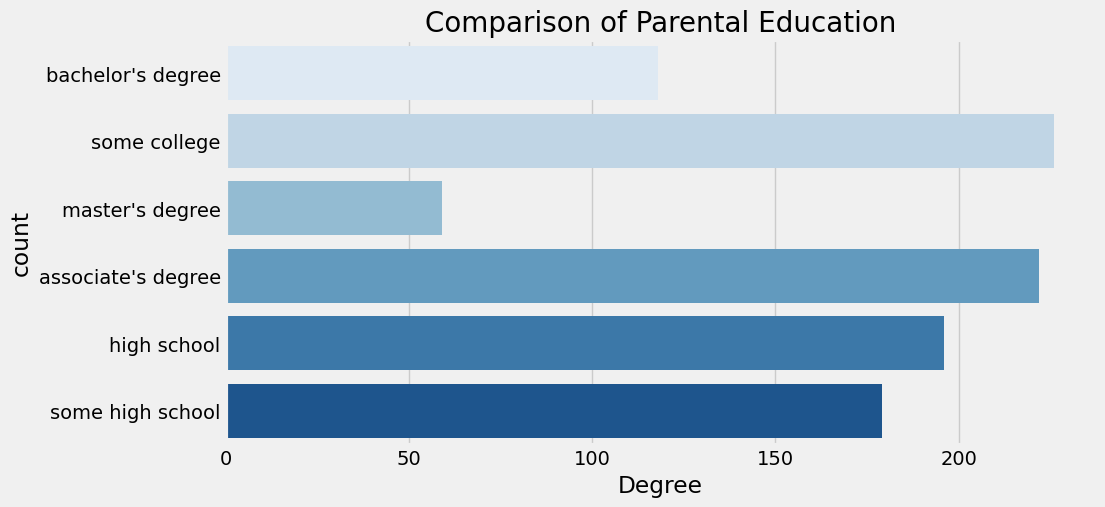

In [68]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

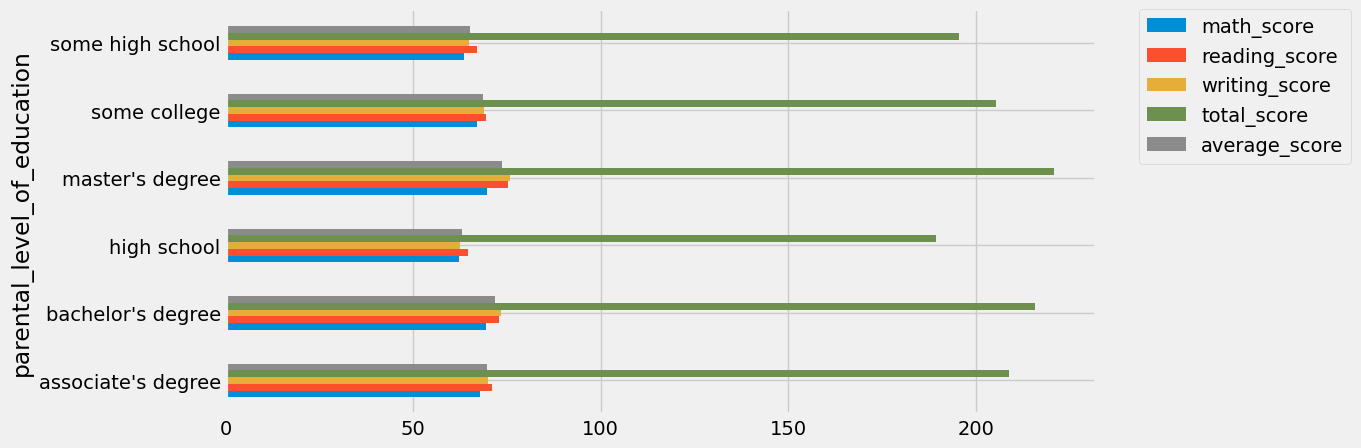

In [71]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

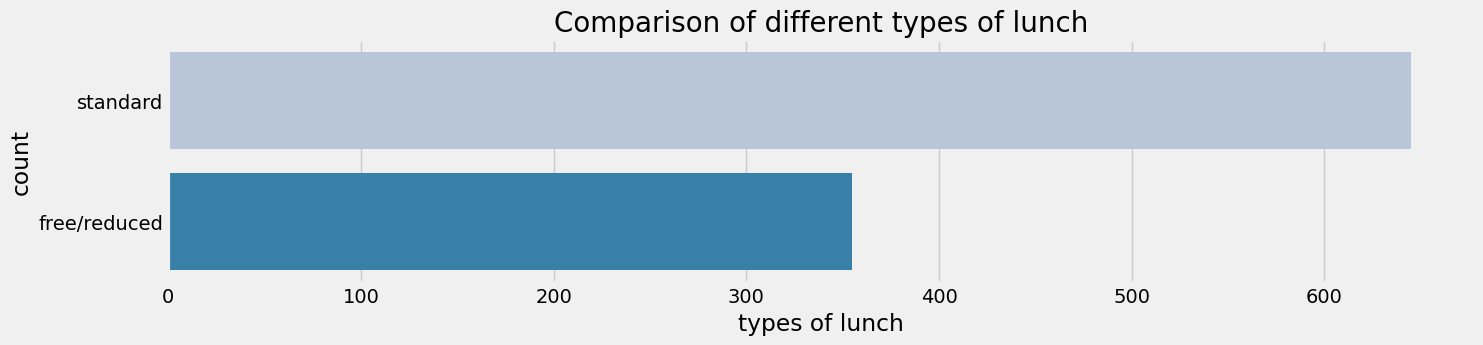

In [75]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

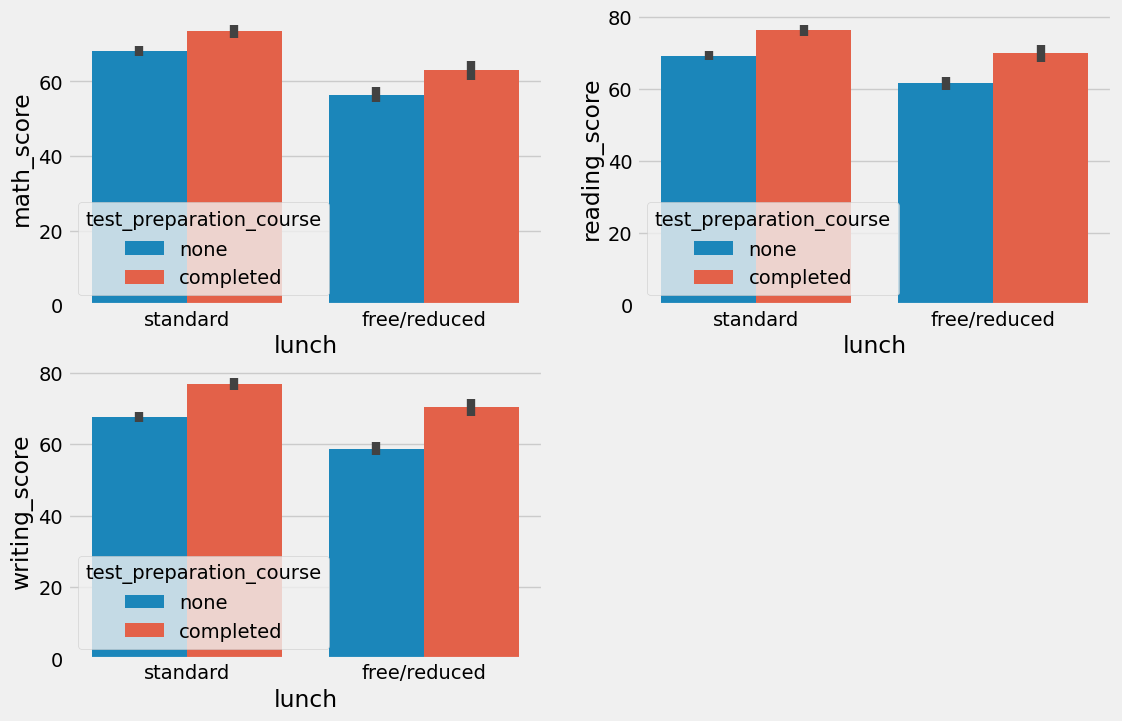

In [77]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

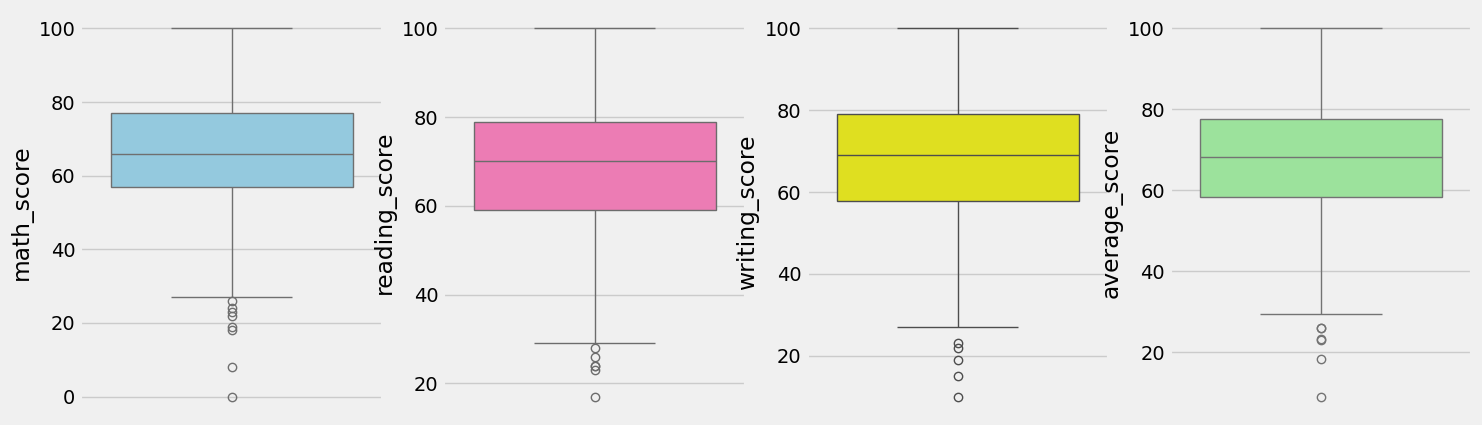

In [78]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

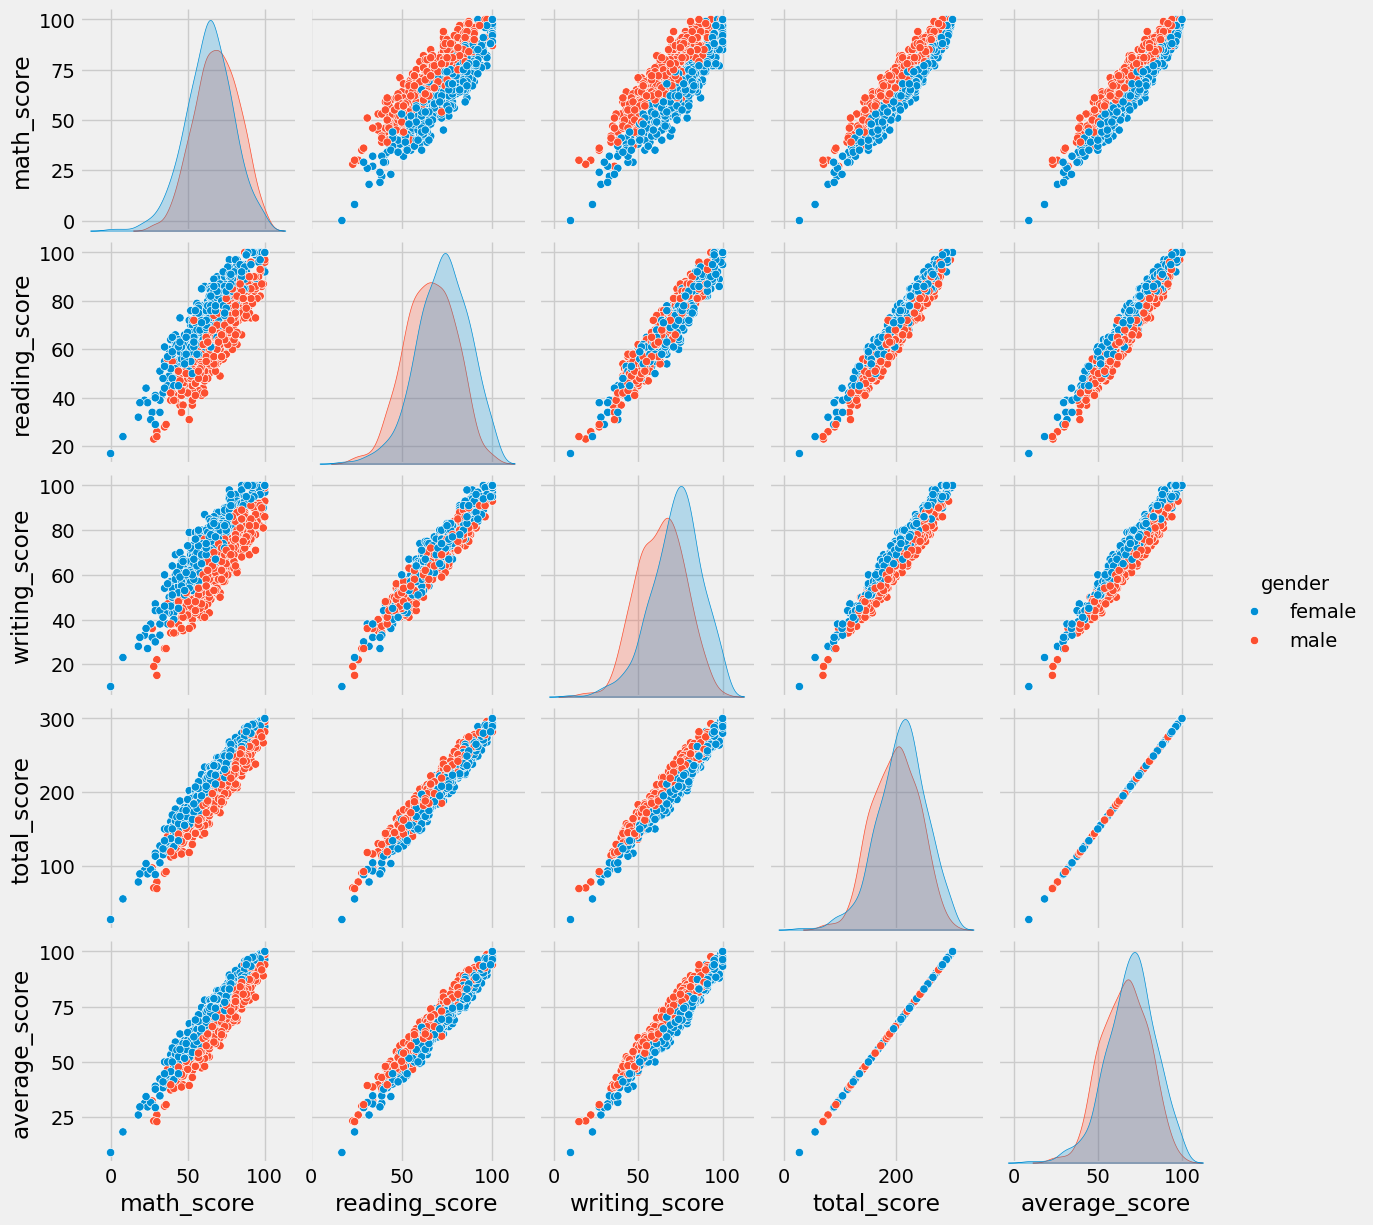

In [79]:
sns.pairplot(df,hue = 'gender')
plt.show()